# 01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Set path
path = r'C:\Users\Marce\careerfoundry\Instacart Basket Analysis'

In [3]:
# Import dataframe from pickle
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_flags.pkl'))

## Creating bar charts

<AxesSubplot:>

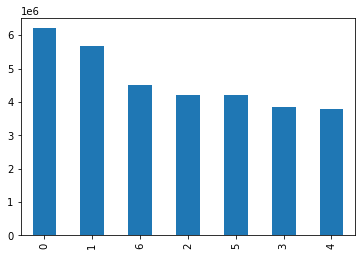

In [4]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

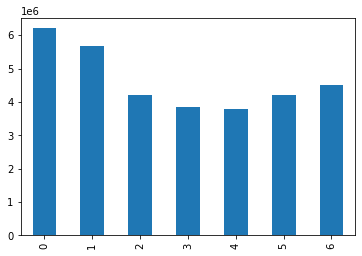

In [5]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

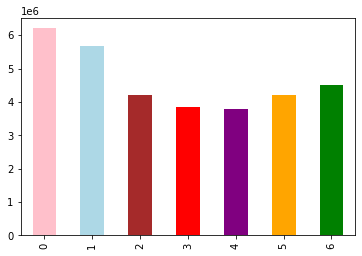

In [6]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color=["pink","lightblue","brown","red","purple","orange","green"])

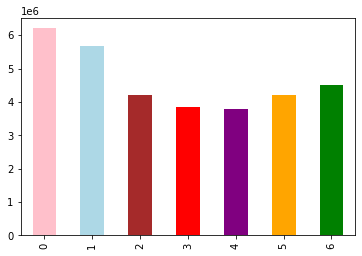

In [7]:
bar.figure

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

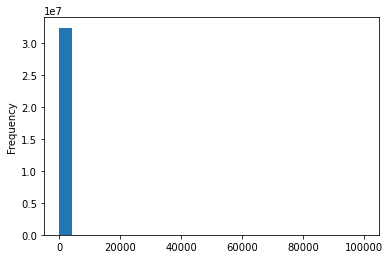

In [9]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

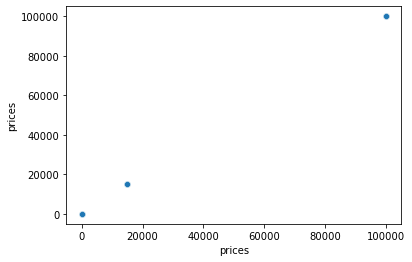

In [10]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [13]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest day,busiest/slowest days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,freq_cust
10030345,171,912404,17,prior,12,2,14,5.0,21553,5,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,181,603376,17,prior,22,6,16,4.0,21553,3,...,High-range product,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,3264360,135,prior,2,2,21,13.0,21553,6,...,High-range product,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,892534,135,prior,3,0,8,12.0,21553,3,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,229704,342,prior,8,1,19,30.0,21553,9,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,prior,29,0,8,4.0,33664,1,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,3386544,2363282,204099,prior,31,0,9,2.0,33664,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3391313,3181945,204395,prior,13,3,15,8.0,33664,25,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,3405096,2486215,205227,prior,7,3,20,4.0,33664,8,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [14]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].max()

25.0

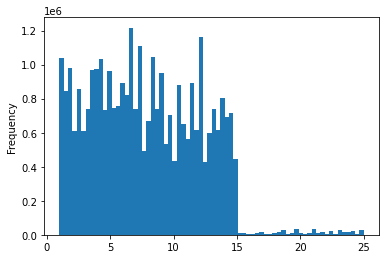

In [19]:
hist = ords_prods_merge["prices"].plot.hist(bins = 70)

In [20]:
hist = hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [23]:
# Create a list holding True/False values to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [25]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [26]:
len(ords_prods_merge)

32404859

In [27]:
len(big) + len(small)

32404859

In [29]:
df_2 = small[['order_dow','prices']]

In [30]:
df_2.head(10)

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
12,2,9.0
13,1,9.0
19,3,9.0
21,4,9.0
22,4,9.0


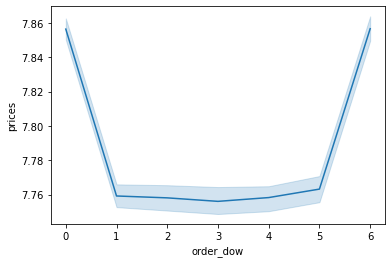

In [31]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')